# Radial Velocity Correction

Be careful with the fact that the date/hours recorded in the HDF file can be different than the real hours when the cube has been taken at least because there is only one date recorded in the HDF5 file but your data may have been taken over multiple nights at different hours. Is is possible to get a more precise radial velocity correction from the exact moment when each individual image of the data cube has been recorded.

In [1]:
%matplotlib inline
from orcs.process import SpectralCube

In [2]:
cube = SpectralCube('A0426_SN3.merged.cm1.1.0.hdf5')

INFO| Data shape : (2048, 2064, 289)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


## Print default barycentric radial velocity correction 

In [5]:
corr = cube.get_radial_velocity_correction(kind='barycentric')
print 'Barycentric velocity correction: {} km/s'.format(corr)

INFO| Observation date: 2016-01-10T00:00:00.000 = 2457397.5 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


Barycentric velocity correction: -21.1861652948 km/s


## Use more precise dates
Here we have created a file (`abell426.dates.list`) which records all the dates at which the individual files have been taken (as supplied by the keyword DATE of each individual FITS file).

```
~/data/1867004o.fits 2016-01-10T05:06:02
~/data/1867005o.fits 2016-01-10T05:06:32
~/data/1867006o.fits 2016-01-10T05:07:03
~/data/1867007o.fits 2016-01-10T05:07:33
~/data/1867008o.fits 2016-01-10T05:08:06
~/data/1867009o.fits 2016-01-10T05:08:36
~/data/1867010o.fits 2016-01-10T05:09:06
~/data/1867011o.fits 2016-01-10T05:09:36
~/data/1867012o.fits 2016-01-10T05:10:08
~/data/1867013o.fits 2016-01-10T05:10:39
~/data/1867014o.fits 2016-01-10T05:11:09
~/data/1867015o.fits 2016-01-10T05:11:40
~/data/1867016o.fits 2016-01-10T05:12:11
~/data/1867017o.fits 2016-01-10T05:12:42
...
```


In [7]:
# The results of the radial velocity correction for 
# each individual file of the initial inteferometric 
# cube are recorded here
fout = open('abell426.barycorr.list', 'w') 

# we loop in the dates file
with open('abell426.dates.list', 'r') as f:
    for line in f:
        date = line.split()[1]
        
        corr = cube.get_radial_velocity_correction(
            kind='barycentric', date=date)
        
        fout.write('{} {}\n'.format(date, corr))
        print date, corr

INFO| Observation date: 2016-01-10T05:06:02.000 = 2457397.71252 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:06:32.000 = 2457397.71287 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:07:03.000 = 2457397.71323 Julian days


2016-01-10T05:06:02 -21.4663846704
2016-01-10T05:06:32 -21.4671673847


INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:07:33.000 = 2457397.71358 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:08:06.000 = 2457397.71396 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:08:36.000 = 2457397.71431 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:07:03 -21.4679767479
2016-01-10T05:07:33 -21.4687605397
2016-01-10T05:08:06 -21.4696233171


INFO| Observation date: 2016-01-10T05:09:06.000 = 2457397.71465 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:09:36.000 = 2457397.715 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:10:08.000 = 2457397.71537 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:08:36 -21.4704082077
2016-01-10T05:09:06 -21.4711936166
2016-01-10T05:09:36 -21.4719795406


INFO| Observation date: 2016-01-10T05:10:39.000 = 2457397.71573 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:11:09.000 = 2457397.71608 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:11:40.000 = 2457397.71644 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:10:08 -21.4728184234
2016-01-10T05:10:39 -21.4736316427
2016-01-10T05:11:09 -21.4744191425


INFO| Observation date: 2016-01-10T05:12:11.000 = 2457397.71679 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:12:42.000 = 2457397.71715 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:13:12.000 = 2457397.7175 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:11:40 -21.4752334194
2016-01-10T05:12:11 -21.4760482283
2016-01-10T05:12:42 -21.4768635658


INFO| Observation date: 2016-01-10T05:13:43.000 = 2457397.71786 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:14:14.000 = 2457397.71822 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:14:45.000 = 2457397.71858 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:13:12 -21.4776531019
2016-01-10T05:13:43 -21.4784694689
2016-01-10T05:14:14 -21.4792863537


INFO| Observation date: 2016-01-10T05:15:15.000 = 2457397.71892 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:15:45.000 = 2457397.71927 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:16:18.000 = 2457397.71965 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:14:45 -21.4801037528
2016-01-10T05:15:15 -21.4808952705
2016-01-10T05:15:45 -21.4816872631


INFO| Observation date: 2016-01-10T05:16:48.000 = 2457397.72 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:17:19.000 = 2457397.72036 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:17:49.000 = 2457397.72071 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:16:18 -21.4825589996
2016-01-10T05:16:48 -21.483351979
2016-01-10T05:17:19 -21.4841718794


INFO| Observation date: 2016-01-10T05:18:20.000 = 2457397.72106 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:18:51.000 = 2457397.72142 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:19:21.000 = 2457397.72177 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:17:49 -21.4849658005
2016-01-10T05:18:20 -21.4857866669
2016-01-10T05:18:51 -21.4866080189


INFO| Observation date: 2016-01-10T05:19:51.000 = 2457397.72212 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:20:24.000 = 2457397.7225 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:20:54.000 = 2457397.72285 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:19:21 -21.4874033346
2016-01-10T05:19:51 -21.4881990985
2016-01-10T05:20:24 -21.4890749523


INFO| Observation date: 2016-01-10T05:21:24.000 = 2457397.72319 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:21:54.000 = 2457397.72354 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:22:27.000 = 2457397.72392 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:20:54 -21.4898716464
2016-01-10T05:21:24 -21.4906687784
2016-01-10T05:21:54 -21.491466345


INFO| Observation date: 2016-01-10T05:22:57.000 = 2457397.72427 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:23:27.000 = 2457397.72462 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:23:57.000 = 2457397.72497 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:22:27 -21.4923441663
2016-01-10T05:22:57 -21.4931426348
2016-01-10T05:23:27 -21.4939415277


INFO| Observation date: 2016-01-10T05:24:30.000 = 2457397.72535 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:25:00.000 = 2457397.72569 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:25:31.000 = 2457397.72605 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:23:57 -21.4947408416
2016-01-10T05:24:30 -21.4956205693
2016-01-10T05:25:00 -21.4964207567


INFO| Observation date: 2016-01-10T05:26:01.000 = 2457397.7264 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:26:33.000 = 2457397.72677 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:27:03.000 = 2457397.72712 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:25:31 -21.4972480486
2016-01-10T05:26:01 -21.4980490679
2016-01-10T05:26:33 -21.4989039337


INFO| Observation date: 2016-01-10T05:27:34.000 = 2457397.72748 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:28:06.000 = 2457397.72785 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:28:37.000 = 2457397.72821 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:27:03 -21.4997057845
2016-01-10T05:27:34 -21.5005347808
2016-01-10T05:28:06 -21.5013909599


INFO| Observation date: 2016-01-10T05:29:07.000 = 2457397.72855 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:29:39.000 = 2457397.72892 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:30:09.000 = 2457397.72927 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:28:37 -21.502220807
2016-01-10T05:29:07 -21.503024278
2016-01-10T05:29:39 -21.5038817364


INFO| Observation date: 2016-01-10T05:30:40.000 = 2457397.72963 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:31:10.000 = 2457397.72998 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:31:42.000 = 2457397.73035 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:30:09 -21.5046859964
2016-01-10T05:30:40 -21.5055174606
2016-01-10T05:31:10 -21.5063224828


INFO| Observation date: 2016-01-10T05:32:13.000 = 2457397.73071 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:32:43.000 = 2457397.73105 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:33:14.000 = 2457397.73141 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:31:42 -21.5071815808
2016-01-10T05:32:13 -21.5080142294
2016-01-10T05:32:43 -21.5088203873


INFO| Observation date: 2016-01-10T05:33:45.000 = 2457397.73177 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:34:15.000 = 2457397.73212 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:34:46.000 = 2457397.73248 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:33:14 -21.5096537947
2016-01-10T05:33:45 -21.5104875823
2016-01-10T05:34:15 -21.5112948321


INFO| Observation date: 2016-01-10T05:35:17.000 = 2457397.73284 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:35:48.000 = 2457397.73319 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:36:18.000 = 2457397.73354 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:34:46 -21.512129357
2016-01-10T05:35:17 -21.5129642512
2016-01-10T05:35:48 -21.513799511


INFO| Observation date: 2016-01-10T05:36:48.000 = 2457397.73389 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:37:20.000 = 2457397.73426 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:37:50.000 = 2457397.73461 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:36:18 -21.5146081714
2016-01-10T05:36:48 -21.5154171673
2016-01-10T05:37:20 -21.5162804624


INFO| Observation date: 2016-01-10T05:38:21.000 = 2457397.73497 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:38:51.000 = 2457397.73531 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:39:23.000 = 2457397.73568 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:37:50 -21.5170901411
2016-01-10T05:38:21 -21.5179271508
2016-01-10T05:38:51 -21.5187374874


INFO| Observation date: 2016-01-10T05:39:53.000 = 2457397.73603 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:40:23.000 = 2457397.73638 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:40:54.000 = 2457397.73674 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:39:23 -21.5196021972
2016-01-10T05:39:53 -21.5204131882
2016-01-10T05:40:23 -21.5212244905


INFO| Observation date: 2016-01-10T05:41:26.000 = 2457397.73711 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:41:56.000 = 2457397.73745 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:42:26.000 = 2457397.7378 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:40:54 -21.52206316
2016-01-10T05:41:26 -21.5229292244
2016-01-10T05:41:56 -21.523741471


INFO| Observation date: 2016-01-10T05:42:56.000 = 2457397.73815 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:43:29.000 = 2457397.73853 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:43:59.000 = 2457397.73888 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:42:26 -21.5245540152
2016-01-10T05:42:56 -21.5253668538
2016-01-10T05:43:29 -21.5262613121


INFO| Observation date: 2016-01-10T05:44:29.000 = 2457397.73922 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:45:00.000 = 2457397.73958 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:45:32.000 = 2457397.73995 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:43:59 -21.5270747577
2016-01-10T05:44:29 -21.5278884872
2016-01-10T05:45:00 -21.5287296356


INFO| Observation date: 2016-01-10T05:46:02.000 = 2457397.7403 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:46:33.000 = 2457397.74066 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:47:03.000 = 2457397.74101 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:45:32 -21.529598228
2016-01-10T05:46:02 -21.530412816
2016-01-10T05:46:33 -21.5312548405


INFO| Observation date: 2016-01-10T05:47:35.000 = 2457397.74138 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:48:05.000 = 2457397.74172 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:48:35.000 = 2457397.74207 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:47:03 -21.5320699739
2016-01-10T05:47:35 -21.5329397396
2016-01-10T05:48:05 -21.5337554131


INFO| Observation date: 2016-01-10T05:49:06.000 = 2457397.74243 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:49:38.000 = 2457397.7428 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:50:08.000 = 2457397.74315 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:48:35 -21.5345713428
2016-01-10T05:49:06 -21.5354147356
2016-01-10T05:49:38 -21.5362856138


INFO| Observation date: 2016-01-10T05:50:38.000 = 2457397.7435 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:51:08.000 = 2457397.74384 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:51:40.000 = 2457397.74421 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:50:08 -21.537102316
2016-01-10T05:50:38 -21.5379192605
2016-01-10T05:51:08 -21.5387364439


INFO| Observation date: 2016-01-10T05:52:10.000 = 2457397.74456 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:52:41.000 = 2457397.74492 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:53:11.000 = 2457397.74527 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:51:40 -21.5396083656
2016-01-10T05:52:10 -21.5404260319
2016-01-10T05:52:41 -21.5412711937


INFO| Observation date: 2016-01-10T05:53:43.000 = 2457397.74564 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:54:13.000 = 2457397.74598 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:54:43.000 = 2457397.74633 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:53:11 -21.5420893209
2016-01-10T05:53:43 -21.5429622341
2016-01-10T05:54:13 -21.5437808155


INFO| Observation date: 2016-01-10T05:55:13.000 = 2457397.74668 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:55:45.000 = 2457397.74705 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:56:15.000 = 2457397.7474 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:54:43 -21.5445996115
2016-01-10T05:55:13 -21.5454186186
2016-01-10T05:55:45 -21.5462924551


INFO| Observation date: 2016-01-10T05:56:45.000 = 2457397.74774 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:57:15.000 = 2457397.74809 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:57:47.000 = 2457397.74846 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:56:15 -21.5471118878
2016-01-10T05:56:45 -21.5479315212
2016-01-10T05:57:15 -21.5487513519


INFO| Observation date: 2016-01-10T05:58:17.000 = 2457397.74881 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:58:47.000 = 2457397.74916 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T05:59:17.000 = 2457397.7495 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:57:47 -21.5496260517
2016-01-10T05:58:17 -21.5504462794
2016-01-10T05:58:47 -21.551266694


INFO| Observation date: 2016-01-10T05:59:49.000 = 2457397.74987 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:00:19.000 = 2457397.75022 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:00:49.000 = 2457397.75057 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T05:59:17 -21.5520872921
2016-01-10T05:59:49 -21.5529627951
2016-01-10T06:00:19 -21.5537837615


INFO| Observation date: 2016-01-10T06:01:19.000 = 2457397.75091 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:01:51.000 = 2457397.75128 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:02:21.000 = 2457397.75163 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:00:49 -21.554604901
2016-01-10T06:01:19 -21.55542621
2016-01-10T06:01:51 -21.5563024561


INFO| Observation date: 2016-01-10T06:02:51.000 = 2457397.75198 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:03:21.000 = 2457397.75233 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:03:53.000 = 2457397.7527 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:02:21 -21.5571241049
2016-01-10T06:02:51 -21.5579459128
2016-01-10T06:03:21 -21.5587678764


INFO| Observation date: 2016-01-10T06:04:23.000 = 2457397.75304 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:04:53.000 = 2457397.75339 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:05:23.000 = 2457397.75374 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:03:53 -21.5596448054
2016-01-10T06:04:23 -21.5604670801
2016-01-10T06:04:53 -21.5612895


INFO| Observation date: 2016-01-10T06:05:56.000 = 2457397.75412 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:06:25.000 = 2457397.75446 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:06:55.000 = 2457397.7548 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:05:23 -21.5621120618
2016-01-10T06:05:56 -21.5630170394
2016-01-10T06:06:25 -21.5638124575


INFO| Observation date: 2016-01-10T06:07:25.000 = 2457397.75515 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:07:57.000 = 2457397.75552 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:08:28.000 = 2457397.75588 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:06:55 -21.564635433
2016-01-10T06:07:25 -21.5654585363
2016-01-10T06:07:57 -21.5663366504


INFO| Observation date: 2016-01-10T06:08:58.000 = 2457397.75623 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:09:28.000 = 2457397.75657 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:10:00.000 = 2457397.75694 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:08:28 -21.5671874547
2016-01-10T06:08:58 -21.5680109329
2016-01-10T06:09:28 -21.5688345251


INFO| Observation date: 2016-01-10T06:10:30.000 = 2457397.75729 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:11:00.000 = 2457397.75764 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:11:29.000 = 2457397.75797 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:10:00 -21.5697131452
2016-01-10T06:10:30 -21.5705369619
2016-01-10T06:11:00 -21.5713608821


INFO| Observation date: 2016-01-10T06:12:02.000 = 2457397.75836 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:12:32.000 = 2457397.7587 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:13:01.000 = 2457397.75904 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:11:29 -21.5721574334
2016-01-10T06:12:02 -21.5730639636
2016-01-10T06:12:32 -21.5738881796


INFO| Observation date: 2016-01-10T06:13:31.000 = 2457397.75939 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:14:04.000 = 2457397.75977 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:14:34.000 = 2457397.76012 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:13:01 -21.5746850069
2016-01-10T06:13:31 -21.5755093956
2016-01-10T06:14:04 -21.5764163188


INFO| Observation date: 2016-01-10T06:15:04.000 = 2457397.76046 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:15:34.000 = 2457397.76081 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:16:06.000 = 2457397.76118 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:14:34 -21.5772408774
2016-01-10T06:15:04 -21.5780655116
2016-01-10T06:15:34 -21.5788902179


INFO| Observation date: 2016-01-10T06:16:36.000 = 2457397.76153 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:17:06.000 = 2457397.76187 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:17:36.000 = 2457397.76222 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:16:06 -21.5797699803
2016-01-10T06:16:36 -21.5805948249
2016-01-10T06:17:06 -21.5814197311


INFO| Observation date: 2016-01-10T06:18:08.000 = 2457397.76259 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:18:38.000 = 2457397.76294 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:19:08.000 = 2457397.76329 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:17:36 -21.5822446955
2016-01-10T06:18:08 -21.5831247178
2016-01-10T06:18:38 -21.5839497916


INFO| Observation date: 2016-01-10T06:19:38.000 = 2457397.76363 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:20:10.000 = 2457397.764 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:20:40.000 = 2457397.76435 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:19:08 -21.5847749131
2016-01-10T06:19:38 -21.5856000789
2016-01-10T06:20:10 -21.5864803006


INFO| Observation date: 2016-01-10T06:21:10.000 = 2457397.7647 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:21:40.000 = 2457397.76505 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:22:12.000 = 2457397.76542 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:20:40 -21.587305547
2016-01-10T06:21:10 -21.5881308271
2016-01-10T06:21:40 -21.5889561375


INFO| Observation date: 2016-01-10T06:22:42.000 = 2457397.76576 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:23:12.000 = 2457397.76611 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:23:42.000 = 2457397.76646 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:22:12 -21.5898364982
2016-01-10T06:22:42 -21.5906618604
2016-01-10T06:23:12 -21.5914872424


INFO| Observation date: 2016-01-10T06:24:14.000 = 2457397.76683 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:24:44.000 = 2457397.76718 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:25:14.000 = 2457397.76752 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:23:42 -21.5923126407
2016-01-10T06:24:14 -21.5931930798
2016-01-10T06:24:44 -21.5940185011


INFO| Observation date: 2016-01-10T06:25:44.000 = 2457397.76787 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:26:16.000 = 2457397.76824 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:26:46.000 = 2457397.76859 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:25:14 -21.5948439282
2016-01-10T06:25:44 -21.5956693578
2016-01-10T06:26:16 -21.5965498147


INFO| Observation date: 2016-01-10T06:27:16.000 = 2457397.76894 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:27:46.000 = 2457397.76928 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:28:18.000 = 2457397.76965 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:26:46 -21.5973752384
2016-01-10T06:27:16 -21.5982006539
2016-01-10T06:27:46 -21.5990260579


INFO| Observation date: 2016-01-10T06:28:48.000 = 2457397.77 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:29:18.000 = 2457397.77035 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:29:48.000 = 2457397.77069 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:28:18 -21.5999064723
2016-01-10T06:28:48 -21.6007318416
2016-01-10T06:29:18 -21.6015571888


INFO| Observation date: 2016-01-10T06:30:21.000 = 2457397.77108 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:30:50.000 = 2457397.77141 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:31:20.000 = 2457397.77176 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:29:48 -21.6023825105
2016-01-10T06:30:21 -21.6032903309
2016-01-10T06:30:50 -21.6040880799


INFO| Observation date: 2016-01-10T06:31:50.000 = 2457397.77211 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:32:23.000 = 2457397.77249 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:32:53.000 = 2457397.77284 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:31:20 -21.604913302
2016-01-10T06:31:50 -21.6057384848
2016-01-10T06:32:23 -21.6066461361


INFO| Observation date: 2016-01-10T06:33:23.000 = 2457397.77318 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:33:52.000 = 2457397.77352 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:34:25.000 = 2457397.7739 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:32:53 -21.6074712248
2016-01-10T06:33:23 -21.6082962635
2016-01-10T06:33:52 -21.6090937501


INFO| Observation date: 2016-01-10T06:34:55.000 = 2457397.77425 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:35:24.000 = 2457397.77458 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:35:54.000 = 2457397.77493 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:34:25 -21.61000117
2016-01-10T06:34:55 -21.6108260337
2016-01-10T06:35:24 -21.6116233412


INFO| Observation date: 2016-01-10T06:36:27.000 = 2457397.77531 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:36:57.000 = 2457397.77566 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:37:27.000 = 2457397.77601 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:35:54 -21.6124480758
2016-01-10T06:36:27 -21.6133552019
2016-01-10T06:36:57 -21.614179784


INFO| Observation date: 2016-01-10T06:37:56.000 = 2457397.77634 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:38:29.000 = 2457397.77672 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:38:59.000 = 2457397.77707 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:37:27 -21.6150042881
2016-01-10T06:37:56 -21.6158012314
2016-01-10T06:38:29 -21.6167080014


INFO| Observation date: 2016-01-10T06:39:29.000 = 2457397.77742 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:39:59.000 = 2457397.77777 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:40:31.000 = 2457397.77814 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:38:59 -21.6175322451
2016-01-10T06:39:29 -21.6183563969
2016-01-10T06:39:59 -21.6191804534


INFO| Observation date: 2016-01-10T06:41:01.000 = 2457397.77848 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:41:31.000 = 2457397.77883 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:42:01.000 = 2457397.77918 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:40:31 -21.620059338
2016-01-10T06:41:01 -21.6208831867
2016-01-10T06:41:31 -21.6217069296


INFO| Observation date: 2016-01-10T06:42:33.000 = 2457397.77955 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-10T06:43:03.000 = 2457397.7799 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:37:27.000 = 2457400.81767 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-10T06:42:01 -21.6225305632
2016-01-10T06:42:33 -21.6234089815
2016-01-10T06:43:03 -21.6242323785


INFO| Observation date: 2016-01-13T07:37:56.000 = 2457400.81801 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:38:26.000 = 2457400.81836 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:38:55.000 = 2457400.81869 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:37:27 -22.6318662679
2016-01-13T07:37:56 -22.6326104603
2016-01-13T07:38:26 -22.6333797594


INFO| Observation date: 2016-01-13T07:39:27.000 = 2457400.81906 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:39:57.000 = 2457400.81941 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:40:26.000 = 2457400.81975 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:38:55 -22.6341228756
2016-01-13T07:39:27 -22.6349422467
2016-01-13T07:39:57 -22.6357098138


INFO| Observation date: 2016-01-13T07:40:55.000 = 2457400.82008 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:41:27.000 = 2457400.82045 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:41:57.000 = 2457400.8208 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:40:26 -22.6364512465
2016-01-13T07:40:55 -22.6371921368
2016-01-13T07:41:27 -22.6380090379


INFO| Observation date: 2016-01-13T07:42:26.000 = 2457400.82113 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:42:55.000 = 2457400.82147 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:43:27.000 = 2457400.82184 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:41:57 -22.6387742763
2016-01-13T07:42:26 -22.6395134458
2016-01-13T07:42:55 -22.6402520609


INFO| Observation date: 2016-01-13T07:43:57.000 = 2457400.82219 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:44:26.000 = 2457400.82252 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:44:56.000 = 2457400.82287 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:43:27 -22.6410664377
2016-01-13T07:43:57 -22.6418292964
2016-01-13T07:44:26 -22.6425661534


INFO| Observation date: 2016-01-13T07:45:27.000 = 2457400.82323 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:45:57.000 = 2457400.82358 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:46:26.000 = 2457400.82391 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:44:56 -22.6433278235
2016-01-13T07:45:27 -22.6441142427
2016-01-13T07:45:57 -22.644874671


INFO| Observation date: 2016-01-13T07:46:56.000 = 2457400.82426 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:47:27.000 = 2457400.82462 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:47:57.000 = 2457400.82497 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:46:26 -22.6456091666
2016-01-13T07:46:56 -22.6463683814
2016-01-13T07:47:27 -22.6471522503


INFO| Observation date: 2016-01-13T07:48:26.000 = 2457400.8253 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:48:56.000 = 2457400.82565 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:49:27.000 = 2457400.82601 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:47:57 -22.6479101976
2016-01-13T07:48:26 -22.6486422831
2016-01-13T07:48:56 -22.6493989923


INFO| Observation date: 2016-01-13T07:49:57.000 = 2457400.82635 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:50:26.000 = 2457400.82669 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:50:56.000 = 2457400.82704 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:49:27 -22.6501802587
2016-01-13T07:49:57 -22.6509356748
2016-01-13T07:50:26 -22.6516653015


INFO| Observation date: 2016-01-13T07:51:28.000 = 2457400.82741 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:51:57.000 = 2457400.82774 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:52:27.000 = 2457400.82809 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:50:56 -22.6524194547
2016-01-13T07:51:28 -22.6532231718
2016-01-13T07:51:57 -22.6539509016


INFO| Observation date: 2016-01-13T07:52:56.000 = 2457400.82843 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:53:28.000 = 2457400.8288 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:53:57.000 = 2457400.82913 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:52:27 -22.6547030833
2016-01-13T07:52:56 -22.6554295684
2016-01-13T07:53:28 -22.656230492


INFO| Observation date: 2016-01-13T07:54:26.000 = 2457400.82947 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:54:56.000 = 2457400.82981 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:55:28.000 = 2457400.83019 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:53:57 -22.656955678
2016-01-13T07:54:26 -22.657680242
2016-01-13T07:54:56 -22.6584291335


INFO| Observation date: 2016-01-13T07:55:57.000 = 2457400.83052 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:56:27.000 = 2457400.83087 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:56:56.000 = 2457400.8312 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:55:28 -22.6592272106
2016-01-13T07:55:57 -22.6599498047
2016-01-13T07:56:27 -22.6606966491


INFO| Observation date: 2016-01-13T07:57:28.000 = 2457400.83157 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:57:57.000 = 2457400.83191 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:58:27.000 = 2457400.83226 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:56:56 -22.6614179512
2016-01-13T07:57:28 -22.6622131289
2016-01-13T07:57:57 -22.6629330832


INFO| Observation date: 2016-01-13T07:58:56.000 = 2457400.83259 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:59:28.000 = 2457400.83296 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T07:59:57.000 = 2457400.8333 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:58:27 -22.6636771846
2016-01-13T07:58:56 -22.6643958235
2016-01-13T07:59:28 -22.6651880491


INFO| Observation date: 2016-01-13T08:00:27.000 = 2457400.83365 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:00:56.000 = 2457400.83398 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:01:28.000 = 2457400.83435 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T07:59:57 -22.6659053159
2016-01-13T08:00:27 -22.6666466251
2016-01-13T08:00:56 -22.6673625532


INFO| Observation date: 2016-01-13T08:01:57.000 = 2457400.83469 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:02:27.000 = 2457400.83503 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:02:56.000 = 2457400.83537 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:01:28 -22.6681517742
2016-01-13T08:01:57 -22.6688663061
2016-01-13T08:02:27 -22.669604774


INFO| Observation date: 2016-01-13T08:03:28.000 = 2457400.83574 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:03:58.000 = 2457400.83609 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:04:27.000 = 2457400.83642 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:02:56 -22.6703179439
2016-01-13T08:03:28 -22.671104108
2016-01-13T08:03:58 -22.6718403887


INFO| Observation date: 2016-01-13T08:04:56.000 = 2457400.83676 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:05:28.000 = 2457400.83713 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:05:58.000 = 2457400.83748 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:04:27 -22.6725514355
2016-01-13T08:04:56 -22.6732618
2016-01-13T08:05:28 -22.6740448554


INFO| Observation date: 2016-01-13T08:06:27.000 = 2457400.83781 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:06:56.000 = 2457400.83815 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:07:28.000 = 2457400.83852 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:05:58 -22.6747782091
2016-01-13T08:06:27 -22.6754864149
2016-01-13T08:06:56 -22.676193927


INFO| Observation date: 2016-01-13T08:07:58.000 = 2457400.83887 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:08:27.000 = 2457400.8392 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:08:57.000 = 2457400.83955 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:07:28 -22.6769738219
2016-01-13T08:07:58 -22.6777042001
2016-01-13T08:08:27 -22.6784095181


INFO| Observation date: 2016-01-13T08:09:28.000 = 2457400.83991 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:09:58.000 = 2457400.84025 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:10:27.000 = 2457400.84059 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:08:57 -22.6791384156
2016-01-13T08:09:28 -22.6798908141
2016-01-13T08:09:58 -22.6806181686


INFO| Observation date: 2016-01-13T08:10:57.000 = 2457400.84094 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:11:28.000 = 2457400.8413 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:11:58.000 = 2457400.84164 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:10:27 -22.6813205522
2016-01-13T08:10:57 -22.6820464024
2016-01-13T08:11:28 -22.6827956394


INFO| Observation date: 2016-01-13T08:12:27.000 = 2457400.84198 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:12:57.000 = 2457400.84233 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:13:29.000 = 2457400.8427 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:11:58 -22.6835199221
2016-01-13T08:12:27 -22.6842193251
2016-01-13T08:12:57 -22.6849420801


INFO| Observation date: 2016-01-13T08:13:58.000 = 2457400.84303 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:14:28.000 = 2457400.84338 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:14:57.000 = 2457400.84372 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:13:29 -22.6857121576
2016-01-13T08:13:58 -22.6864092694
2016-01-13T08:14:28 -22.6871296454


INFO| Observation date: 2016-01-13T08:15:29.000 = 2457400.84409 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:15:58.000 = 2457400.84442 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:16:28.000 = 2457400.84477 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:14:57 -22.6878252577
2016-01-13T08:15:29 -22.6885919697
2016-01-13T08:15:58 -22.68928602


INFO| Observation date: 2016-01-13T08:16:57.000 = 2457400.8451 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:17:29.000 = 2457400.84547 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:17:58.000 = 2457400.84581 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:16:28 -22.6900032172
2016-01-13T08:16:57 -22.6906957454
2016-01-13T08:17:29 -22.6914590414


INFO| Observation date: 2016-01-13T08:18:28.000 = 2457400.84616 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:18:57.000 = 2457400.84649 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:19:29.000 = 2457400.84686 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:17:58 -22.6921499844
2016-01-13T08:18:28 -22.6928639555
2016-01-13T08:18:57 -22.693553354


INFO| Observation date: 2016-01-13T08:19:58.000 = 2457400.8472 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:20:27.000 = 2457400.84753 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:20:57.000 = 2457400.84788 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:19:29 -22.6943131838
2016-01-13T08:19:58 -22.695000974
2016-01-13T08:20:27 -22.6956879955


INFO| Observation date: 2016-01-13T08:21:29.000 = 2457400.84825 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:21:58.000 = 2457400.84859 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:22:28.000 = 2457400.84894 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:20:57 -22.6963978956
2016-01-13T08:21:29 -22.6971542093
2016-01-13T08:21:58 -22.6978388014


INFO| Observation date: 2016-01-13T08:22:57.000 = 2457400.84927 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:23:29.000 = 2457400.84964 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:23:58.000 = 2457400.84998 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:22:28 -22.6985461798
2016-01-13T08:22:57 -22.6992291831
2016-01-13T08:23:29 -22.6999819309


INFO| Observation date: 2016-01-13T08:24:28.000 = 2457400.85032 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:24:57.000 = 2457400.85066 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s
INFO| Observation date: 2016-01-13T08:25:29.000 = 2457400.85103 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:23:58 -22.7006632801
2016-01-13T08:24:28 -22.7013672923
2016-01-13T08:24:57 -22.7020470306


INFO| Observation date: 2016-01-13T08:25:58.000 = 2457400.85137 Julian days
INFO| Observatory location: LAT 19.825232 deg |LON -155.468761 deg |ALT 4215.0 m
INFO| Observed Target: 03h19m53.19s +41d33m51s


2016-01-13T08:25:29 -22.7027961631
2016-01-13T08:25:58 -22.7034742246


## output
File `abell426.barycorr.list` has been created with the previous code.

```
2016-01-10T05:06:02 -21.4663846704
2016-01-10T05:06:32 -21.4671673847
2016-01-10T05:07:03 -21.4679767479
2016-01-10T05:07:33 -21.4687605397
2016-01-10T05:08:06 -21.4696233171
2016-01-10T05:08:36 -21.4704082077
2016-01-10T05:09:06 -21.4711936166
2016-01-10T05:09:36 -21.4719795406
2016-01-10T05:10:08 -21.4728184234
2016-01-10T05:10:39 -21.4736316427
2016-01-10T05:11:09 -21.4744191425
2016-01-10T05:11:40 -21.4752334194
2016-01-10T05:12:11 -21.4760482283
2016-01-10T05:12:42 -21.4768635658
2016-01-10T05:13:12 -21.4776531019
2016-01-10T05:13:43 -21.4784694689
2016-01-10T05:14:14 -21.4792863537
2016-01-10T05:14:45 -21.4801037528
2016-01-10T05:15:15 -21.4808952705
2016-01-10T05:15:45 -21.4816872631
2016-01-10T05:16:18 -21.4825589996
...
```

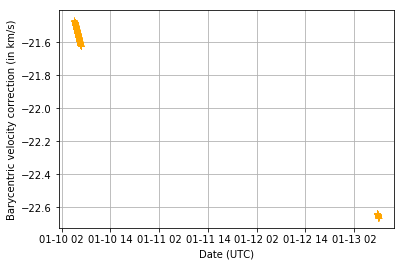

In [9]:
# Now, we can then display the output file, 
# i.e. the barycentric velocity correction

import astropy.time

dates = list() ; corrs = list()
with open('abell426.barycorr.list', 'r') as f:
    for line in f:
        line = line.split()
        dates.append(line[0])
        corrs.append(float(line[1]))

dates = astropy.time.Time(dates, format='isot', scale='utc')
        
import pylab as pl
pl.plot_date(dates.plot_date, corrs, ls='None', marker='+', c='orange')
pl.grid()
pl.xlabel('Date (UTC)')
pl.ylabel('Barycentric velocity correction (in km/s)')

# How to use the computed correction

In general, for km/s precision, just add the barycentric velocity to the measured velocity. For higher precision you can refer to http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.radial_velocity_correction